# Milli Marş Melodisi Oluşturma ve Ses İşleme Projesi

## 1. Giriş

Bu projede, İstiklal Marşı'nın sözlerini kullanarak özgün bir melodi oluşturacak, bu melodiyi işleyecek ve görselleştireceğiz. Proje, metin işleme, müzik teorisi, ses üretimi ve veri görselleştirme tekniklerini bir araya getirmektedir.

## 2. Gerekli Kütüphanelerin Yüklenmesi ve İçe Aktarılması

Öncelikle, projemiz için gerekli kütüphaneleri yükleyelim ve içe aktaralım.

In [10]:
!pip install midiutil numpy matplotlib librosa pretty_midi

import random
import numpy as np
import matplotlib.pyplot as plt
from midiutil import MIDIFile
import librosa
import librosa.display
import pretty_midi


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## 3. İstiklal Marşı Metni ve Harf-Nota Eşleştirmesi

Şimdi, İstiklal Marşı'nın ilk iki kıtasını tanımlayalım ve her harfe benzersiz bir MIDI notası atayalım.

In [11]:
istiklal_marsi = '''
Korkma, sönmez bu şafaklarda yüzen al sancak;
Sönmeden yurdumun üstünde tüten en son ocak.
O benim milletimin yıldızıdır, parlayacak;
O benimdir, o benim milletimindir ancak.

Çatma, kurban olayım çehreni ey nazlı hilâl!
Kahraman ırkıma bir gül… ne bu şiddet bu celâl?
Sana olmaz dökülen kanlarımız sonra helâl,
Hakkıdır, Hakk'a tapan, milletimin istiklâl.
'''

harfler = 'abcçdefgğhıijklmnoöprsştuüvyz'
notalar = list(range(60, 60 + len(harfler)))  # C4 (60) ile başlayarak her harf için benzersiz bir nota
random.shuffle(notalar)  # Notaları karıştırarak daha ilginç bir melodi elde edebiliriz
harf_nota_dict = {harf: nota for harf, nota in zip(harfler, notalar)}

print("Harf-Nota Eşleştirmesi:")
for harf, nota in harf_nota_dict.items():
    print(f"{harf}: {nota}")

Harf-Nota Eşleştirmesi:
a: 80
b: 63
c: 67
ç: 87
d: 71
e: 75
f: 68
g: 70
ğ: 61
h: 66
ı: 78
i: 88
j: 60
k: 65
l: 83
m: 64
n: 85
o: 86
ö: 84
p: 81
r: 69
s: 62
ş: 76
t: 79
u: 77
ü: 74
v: 82
y: 72
z: 73


## 4. Metni Notaya Dönüştürme

Şimdi, metnimizi notaya dönüştürmek için bir fonksiyon yazalım ve bu fonksiyonu kullanarak normal ve ters melodilerimizi oluşturalım.

In [12]:
def metni_notaya_cevir(metin):
    return [harf_nota_dict.get(harf.lower(), -1) for harf in metin if harf.isalpha()]

normal_melodi = metni_notaya_cevir(istiklal_marsi)
ters_melodi = metni_notaya_cevir(istiklal_marsi[::-1])

print("Normal Melodinin İlk 10 Notası:", normal_melodi[:10])
print("Ters Melodinin İlk 10 Notası:", ters_melodi[:10])

Normal Melodinin İlk 10 Notası: [65, 86, 69, 65, 64, 80, 62, 84, 85, 64]
Ters Melodinin İlk 10 Notası: [83, -1, 83, 65, 88, 79, 62, 88, 85, 88]


## 5. MIDI Dosyası Oluşturma

Oluşturduğumuz melodileri kullanarak bir MIDI dosyası oluşturalım.

In [13]:
midi = MIDIFile(1)
track = 0
time = 0
midi.addTrackName(track, time, "Istiklal Marsi Melodisi")
midi.addTempo(track, time, 120)

# Normal melodiyi ekleyelim
for i, nota in enumerate(normal_melodi):
    if nota != -1:
        duration = 0.5 if i % 2 == 0 else 0.25
        midi.addNote(track, 0, nota, time, duration, 100)
        time += duration

# Ters melodiyi ekleyelim        
for i, nota in enumerate(ters_melodi):
    if nota != -1:
        duration = 0.25 if i % 2 == 0 else 0.5
        midi.addNote(track, 0, nota, time, duration, 80)
        time += duration

with open("istiklal_marsi_melodi.mid", "wb") as output_file:
    midi.writeFile(output_file)

print("MIDI dosyası 'istiklal_marsi_melodi.mid' adıyla kaydedildi.")

MIDI dosyası 'istiklal_marsi_melodi.mid' adıyla kaydedildi.


## 6. MIDI'yi Ses Verisine Dönüştürme

Oluşturduğumuz MIDI dosyasını ses verisine dönüştürelim.

In [14]:
midi_data = pretty_midi.PrettyMIDI("istiklal_marsi_melodi.mid")
audio_data = midi_data.synthesize()

print("Ses verisinin uzunluğu:", len(audio_data))
print("Ses verisinin örnek değerleri:", audio_data[:10])

Ses verisinin uzunluğu: 4729725
Ses verisinin örnek değerleri: [0.         0.04974818 0.09937096 0.14874554 0.1977497  0.24626219
 0.29416294 0.34133342 0.38765691 0.43301878]


## BONUS: 7. Melodilerin Görselleştirilmesi

Şimdi, oluşturduğumuz normal ve ters melodileri görselleştirelim.

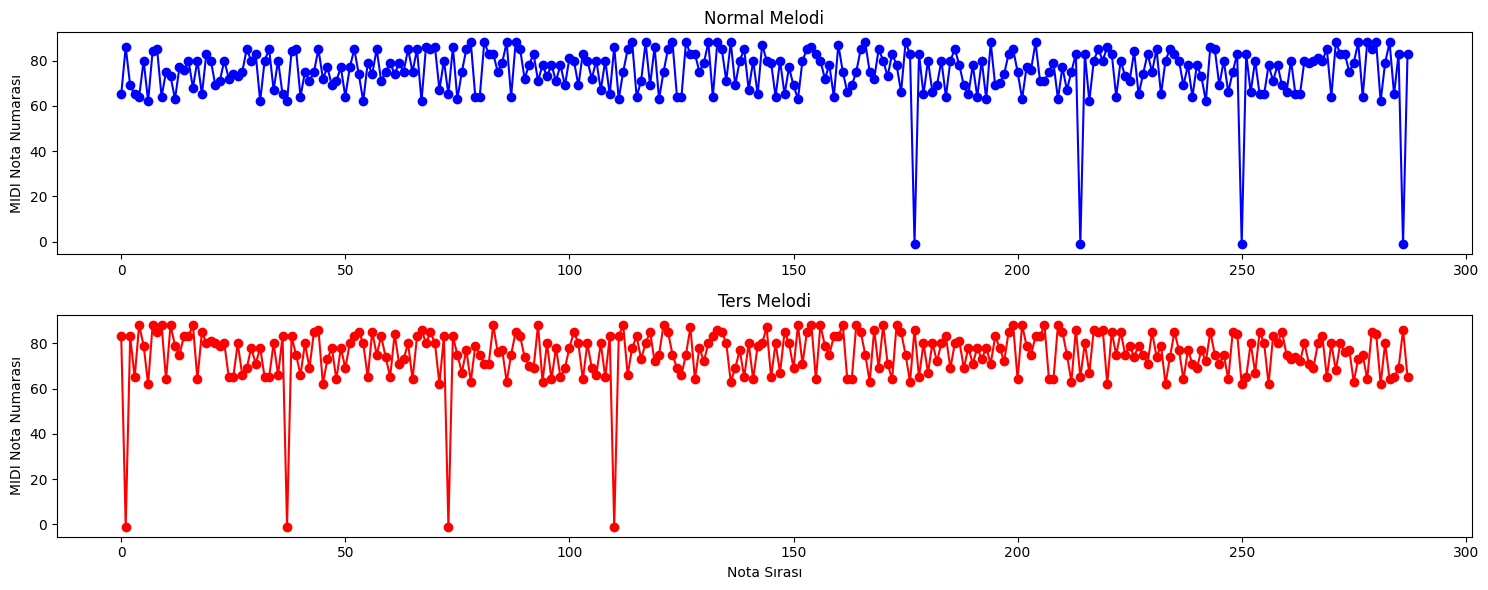

Melodi görselleştirmesi 'istiklal_marsi_melodileri.png' adıyla kaydedildi.


In [15]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.title("Normal Melodi")
plt.plot(normal_melodi, 'b-o')
plt.ylabel("MIDI Nota Numarası")

plt.subplot(2, 1, 2)
plt.title("Ters Melodi")
plt.plot(ters_melodi, 'r-o')
plt.ylabel("MIDI Nota Numarası")
plt.xlabel("Nota Sırası")

plt.tight_layout()
plt.savefig("istiklal_marsi_melodileri.png")
plt.show()
print("Melodi görselleştirmesi 'istiklal_marsi_melodileri.png' adıyla kaydedildi.")

## BONUS: 8. Librosa ile Ses İşleme ve Güncelleme

Librosa kütüphanesi ile ses verimizi işleyelim ve güncelleyelim.

In [16]:
sr = 44100  # Örnek hızı 
y = audio_data

# Tempo algılama ve ritim güncelleme
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
y_harmonic, y_percussive = librosa.effects.hpss(y)
y_rhythmic = y_percussive + 0.5 * y_harmonic

# Pitch shifting uygulama
y_pitched = librosa.effects.pitch_shift(y_rhythmic, sr=sr, n_steps=2)

# Reverb efekti ekleme
y_reverb = np.convolve(y_pitched, np.exp(-np.linspace(0, 2, 1000)), mode='same')

print("Orijinal ses verisinin uzunluğu:", len(y))
print("İşlenmiş ses verisinin uzunluğu:", len(y_reverb))

Orijinal ses verisinin uzunluğu: 4729725
İşlenmiş ses verisinin uzunluğu: 4729725


## BONUS: 9. Güncellenmiş Ses Dosyasının Görselleştirilmesi

Son olarak, güncellenmiş ses dosyamızı çeşitli şekillerde görselleştirelim.

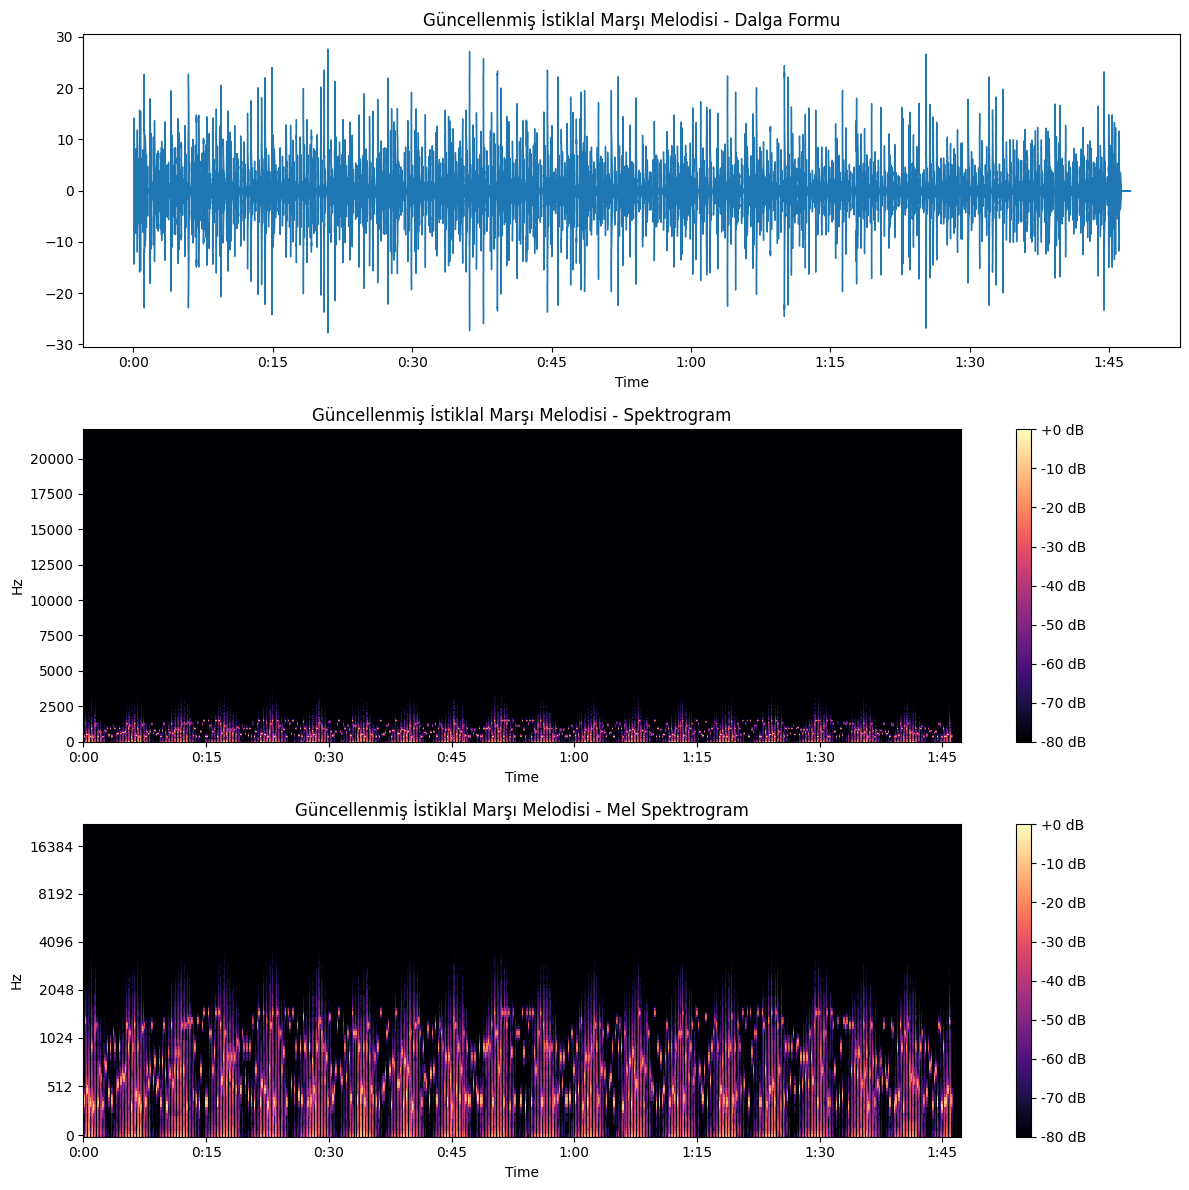

Güncellenmiş melodi görselleştirmesi 'istiklal_marsi_guncellenmis_gorsellestirme.png' adıyla kaydedildi.


In [17]:
plt.figure(figsize=(12, 12))

# Dalga formu
plt.subplot(3, 1, 1)
librosa.display.waveshow(y_reverb, sr=sr)
plt.title('Güncellenmiş İstiklal Marşı Melodisi - Dalga Formu')

# Spektrogram
D = librosa.stft(y_reverb)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.subplot(3, 1, 2)
librosa.display.specshow(S_db, x_axis='time', y_axis='hz', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Güncellenmiş İstiklal Marşı Melodisi - Spektrogram')

# Mel Spektrogram
S = librosa.feature.melspectrogram(y=y_reverb, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.subplot(3, 1, 3)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Güncellenmiş İstiklal Marşı Melodisi - Mel Spektrogram')

plt.tight_layout()
plt.savefig("istiklal_marsi_guncellenmis_gorsellestirme.png")
plt.show()
print("Güncellenmiş melodi görselleştirmesi 'istiklal_marsi_guncellenmis_gorsellestirme.png' adıyla kaydedildi.")

## 10. Sonuç ve Değerlendirme

Bu projede, İstiklal Marşı'nın sözlerini kullanarak özgün bir melodi oluşturduk ve bu melodiyi çeşitli şekillerde işledik. Projenin ana adımları şu şekildeydi:

1. İstiklal Marşı'nın ilk iki kıtasını kullanarak her harfe benzersiz bir MIDI notası atadık.
2. Metni normal ve ters sırada notaya dönüştürerek iki farklı melodi oluşturduk. 
3. Bu melodileri MIDI formatında kaydettik.
4. MIDI dosyasını ses verisine dönüştürdük.
5. Oluşturulan melodileri görselleştirdik.
6. Ses verisini Librosa kütüphanesi ile işleyerek ritmi güncelledik, pitch shifting uyguladık ve reverb efekti ekledik.
7. Son olarak, güncellenmiş ses verisini farklı şekillerde görselleştirdik.

Bu proje, müzik ve veri bilimi kesişiminde ilginç bir uygulama sunmakta, metin işleme, müzik teorisi, ses üretimi, ses işleme ve veri görselleştirme tekniklerini bir araya getirmektedir.